### Table of Content

[1. Logistic Regression Codes](#lgr1) <br>

[2. Comparison with Scikit-Learn](#lgr2) <br>


## <a id='lgr1'></a> 1. Logistic Regression Codes

In [1]:
import pandas as pd
import numpy as np

In [2]:
def sigmoid_func(z):
    """
    The implementaion of sigmoid function
    Inputs: z - numpy.ndarray, the intermediate linear results
    Outputs: y_hat - numpy.ndarray, the mapped probaility by sigmoid
    """
    y_hat = 1/(1 + np.exp(-z))
    return y_hat

def y_hat_calc(X, b, W):
    """
    Calculate the predicted outputs, y_hat
    Inputs: X - numpy.ndarray, the input feature values
            b - float/int, bias
            W - numpy.ndarray, weights of features
    Outputs: y_hat.T - numpy.ndarray, the transposed predicted probaility outputs 
    """
    z = np.dot(W.T, X) + b
    y_hat = sigmoid_func(z)
    return y_hat.T
    
def cross_entropy_loss(Y, y_hat):
    """
    Find the cross-entropy loss between true outputs and predicted outputs
    Inputs: Y - numpy.ndarray, the true output values
            y_hat - numpy.ndarray, the predicted output values
    Outputs: L - numpy.ndarray, the cross-entropy loss
    """
    L = - np.sum( np.dot(Y.T, np.log(y_hat)) + np.dot((1 - Y).T, np.log(1 - y_hat)) ) / Y.shape[0]
    return L

In [3]:
def predict_class(X, b, W):
    '''
    Calculate the predicted class based on default threshold 0.5
    Inputs: X - numpy.ndarray, the input feature values
            b - float/int, bias
            W - numpy.ndarray, weights of features
    Outputs: numpy.ndarray, the predicted class, 1 or 0
    '''
    return np.where(y_hat_calc(X, b, W) >= 0.5, 1, 0)

def predict_accuracy(Y, X, b, W):
    '''
    Calculate the accuracy between true and predicted outputs
    Inputs: Y - numpy.ndarray, the true output values
            X - numpy.ndarray, the input feature values
            b - float/int, bias
            W - numpy.ndarray, weights of features
    Outputs: float, in range of [0.0, 1.0]
    '''
    return np.sum(Y == predict_class(X, b, W)) / Y.shape[0]

In [4]:
def update_bias_weights(X, Y, y_hat, b, W, learning_rate):
    """
    Update the bias and weights based on Gradient Descent 
    Inputs: X - numpy.ndarray, the input feature values
            Y - numpy.ndarray, the true output values
            y_hat - numpy.ndarray, the predicted output values
            b - float/int, bias
            W - numpy.ndarray, weights of features
            learning_rate - float, the learning rate used in Gradient Descent
    Outputs: (b, W) - tuple, the updated bias and weights
    """
    dL_db = np.sum(y_hat - Y) / X.shape[1]
    dL_dW = np.dot(X, (y_hat-Y)) / X.shape[1] 
    
    b = b - dL_db * learning_rate
    W = W - dL_dW * learning_rate
    
    return (b, W)

In [5]:
def train(X, Y, b, W, learning_rate, learning_iterations):
    """
    Train logistic regression model for the specified iterations
    Inputs: X - numpy.ndarray, the input feature values
            Y - numpy.ndarray, the true output values
            b - float/int, bias
            W - numpy.ndarray, weights of features
            learning_rate - float, the learning rate used in Gradient Descent
            learning_iterations - int, the number of times of training
    Outputs: (loss_history, b, W) - tuple, return the loss_history, and 
                                            the final bias and weights
    """
    loss_history = []
    for i in range(learning_iterations):
        y_hat = y_hat_calc(X, b, W)
        
        b, W = update_bias_weights(X, Y, y_hat, b, W, learning_rate)
        
        # find loss after the ith iteration of updating bias and weights
        L = cross_entropy_loss(Y, y_hat_calc(X, b, W))
        loss_history.append(L)
        
        if i < 5 or i >= learning_iterations-5:
            print ("iter={:d} \t b={:.5f} \t W1={:.5f} \t W2={:.5f} \t loss={}".format(i+1, b, W[0][0], W[1][0], L))

    return (loss_history, b, W)

In [6]:
def max_min_norm(X):
    """
    Normalize dataset by using the Max-min normalization technique
    Inputs: X - numpy.ndarray, the dataset for normalization
    Outputs: (X_norm, np.array(max_min_vals)) - tuple, return the normalized dataset, 
                                            and the max and min values of each feature
    """
    X_norm = X.copy().astype(float)
    max_min_vals = []
    for col in range(0, X_norm.shape[1]):
        X_max = X_norm[:, col].max()
        X_min = X_norm[:, col].min()
        X_range = X_max - X_min
        X_norm[:, col] = (X_norm[:, col] - X_min) / X_range
        max_min_vals.append({"X_max":X_max, "X_min":X_min, "X_range":X_range})
    return (X_norm, np.array(max_min_vals))

In [7]:
# The small dataset
data = np.array([[1600,5,1],
                 [1200,4,1],
                 [740,2,0]])
col_names = ['size_sqft', 'num_bedrooms', 'is_easy_sell']
print(pd.DataFrame(data, columns=col_names), "\n")

X = data[:, :-1] # all rows, all columns except the last column
Y = data[:, -1]  # all rows, last column only

X, max_min_vals = max_min_norm(X) # normalize the input features
X = X.T
Y = Y.reshape(-1,1)

# Initialize bias and weights
initial_b = 0
initial_W1 = 0
initial_W2 = 0

# Set learing rate and iterations
learning_rate = 0.1
learning_iterations = 500000

# Start the training of logistic regression model
loss_history, b, W = train(X, Y, initial_b, np.array([[initial_W1],[initial_W2]]), learning_rate, learning_iterations)

   size_sqft  num_bedrooms  is_easy_sell
0       1600             5             1
1       1200             4             1
2        740             2             0 

iter=1 	 b=0.01667 	 W1=0.02558 	 W2=0.02778 	 loss=0.6764246196944534
iter=2 	 b=0.03220 	 W1=0.05036 	 W2=0.05470 	 loss=0.6609103694374685
iter=3 	 b=0.04666 	 W1=0.07438 	 W2=0.08081 	 loss=0.6465026917750528
iter=4 	 b=0.06010 	 W1=0.09766 	 W2=0.10613 	 loss=0.6331070942469185
iter=5 	 b=0.07256 	 W1=0.12024 	 W2=0.13071 	 loss=0.6206362623737394
iter=499996 	 b=-8.40173 	 W1=12.69092 	 W2=15.49013 	 loss=0.00012961536388369103
iter=499997 	 b=-8.40174 	 W1=12.69092 	 W2=15.49013 	 loss=0.00012961510448407314
iter=499998 	 b=-8.40174 	 W1=12.69092 	 W2=15.49013 	 loss=0.0001296148450854918
iter=499999 	 b=-8.40174 	 W1=12.69093 	 W2=15.49014 	 loss=0.00012961458568794696
iter=500000 	 b=-8.40174 	 W1=12.69093 	 W2=15.49014 	 loss=0.00012961432629147565


In [8]:
print("accuracy for training dataset:", predict_accuracy(Y, X, b, W))

accuracy for training dataset: 1.0


In [9]:
print("training dataset, probability of belonging to class 1:\n",
       np.round(y_hat_calc(X, b, W),4))

training dataset, probability of belonging to class 1:
 [[1.000e+00]
 [9.998e-01]
 [2.000e-04]]


In [10]:
print("training dataset, predicted class:\n",
       predict_class(X, b, W))

training dataset, predicted class:
 [[1]
 [1]
 [0]]


In [11]:
new_data = np.array([[1200,3]], dtype = float)

# Max-min normalization
for col in range(0, new_data.shape[1]):
    new_data[:, col] = ((new_data[:, col] 
                        - max_min_vals[col]['X_min']) 
                        / max_min_vals[col]['X_range'])

new_data = new_data.T

predicted_class = predict_class(new_data, b, W)

print ("For the house with 1200 sqft and 3 bedrooms, predicted class:", 
       '1 (i.e., Yes, easy to sell)' if predicted_class[0][0] == 1 
       else '0 (i.e., No, not easy to sell)')

print ("\n, and probability of belonging to class 1 is", 
       np.round(y_hat_calc(new_data, b, W)[0][0], 2))

For the house with 1200 sqft and 3 bedrooms, predicted class: 1 (i.e., Yes, easy to sell)

, and probability of belonging to class 1 is 0.97


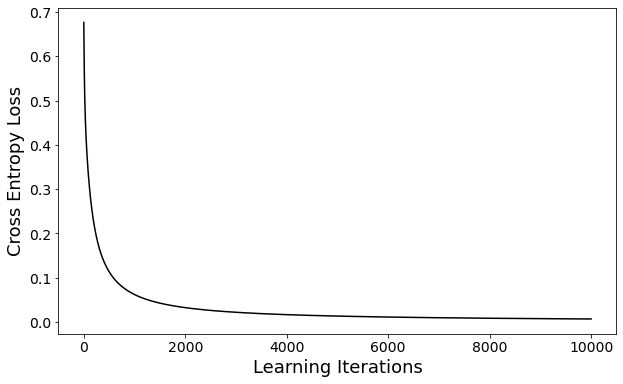

In [12]:
import matplotlib.pyplot as plt

itr = list(range(0, learning_iterations))
fig = plt.figure(figsize = (10, 6))
plt.xlabel('Learning Iterations', fontsize=18)
plt.ylabel('Cross Entropy Loss', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
# plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
# plt.tick_params(axis='y', which='both', bottom=False, top=False, labelbottom=False)
# plt.scatter(itr[0:100], cost_history[0:100], s=20)
plt.plot(itr[:10000], loss_history[:10000], color='black')
# plt.savefig('LGR_10000.jpg', dpi=600)
plt.show()

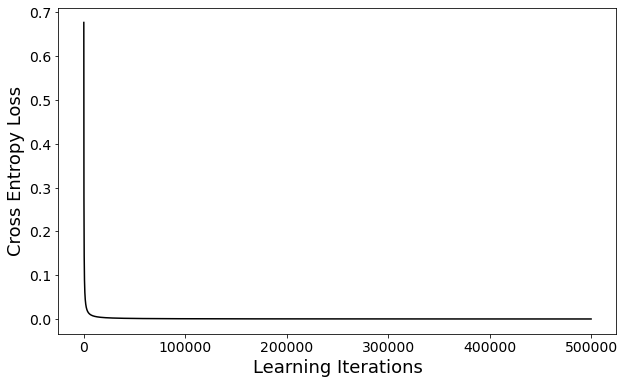

In [13]:
itr = list(range(0, learning_iterations))
fig = plt.figure(figsize = (10, 6))
plt.xlabel('Learning Iterations', fontsize=18)
plt.ylabel('Cross Entropy Loss', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14)
# plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
# plt.tick_params(axis='y', which='both', bottom=False, top=False, labelbottom=False)
plt.plot(itr[:], loss_history[:], color='black')
# plt.savefig('LGR_all.jpg', dpi=600)
plt.show()

## <a id='lgr2'></a> 2. Comparison with Scikit-Learn

In [14]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

# The small dataset
data = np.array([[1600,5,1],
                 [1200,4,1],
                 [740,2,0]])

X = data[:, :-1] # all rows, all columns except the last column
Y = data[:, -1]  # all rows, last column only

scaler = MinMaxScaler()
scaler.fit(X)
X = scaler.transform(X) # update to Normalized X

lgr = LogisticRegression(penalty='none', tol=1.5e-4).fit(X, Y)

print("accuracy for training dataset:", accuracy_score(Y, lgr.predict(X)))

accuracy for training dataset: 1.0


In [15]:
print("training dataset, probabilities of belonging to class 1:\n",
       np.round(lgr.predict_proba(X)[:,1].reshape(-1,1), 4))

training dataset, probabilities of belonging to class 1:
 [[1.000e+00]
 [9.998e-01]
 [2.000e-04]]


In [16]:
print("training dataset, predicted class:\n",
       lgr.predict(X).reshape(-1,1))

training dataset, predicted class:
 [[1]
 [1]
 [0]]


In [17]:
new_data = np.array([[1200,3]], dtype = float)
new_data = scaler.transform(new_data)

print ("For the house with 1200 sqft and 3 bedrooms, predicted class:", 
       '1 (i.e., Yes, easy to sell)' if lgr.predict(new_data)[0] == 1 
       else '0 (i.e., No, not easy to sell)')

print ("\n, and probability of belonging to class 1 is", 
       np.round(lgr.predict_proba(new_data)[0][1], 2))

For the house with 1200 sqft and 3 bedrooms, predicted class: 1 (i.e., Yes, easy to sell)

, and probability of belonging to class 1 is 0.97
